In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sns
from sklearn import preprocessing

In [2]:
rcParams['figure.figsize'] = 8, 5
plt.rc('grid', linestyle="--", color='gray')

# https://learnui.design/tools/data-color-picker.html#palette
colors = ['#33508f', '#ff5d68', '#ffa600','#af4f9b']

In [3]:
results = pd.read_csv("ox/results.csv")
results.head()

,Name,ED/ES,Vendor,Centre,Dice LV,Jaccard LV,Hausdorff LV,ASSD LV,Dice MYO,Jaccard MYO,Hausdorff MYO,ASSD MYO,Dice RV,Jaccard RV,Hausdorff RV,ASSD RV
0,A1K2P5_sa_ED_gt,ED,D,5,0.959781,0.922673,3.977500,0.236487,0.846966,0.734555,4.283899,0.337041,0.909640,0.834257,11.137001,0.534781
1,A1K2P5_sa_ES_gt,ES,D,5,0.927713,0.865173,6.364000,0.313557,0.909632,0.834242,5.625035,0.279368,0.913922,0.841489,11.825957,0.401867
2,A2D1L1_sa_ED_gt,ED,A,6,0.946202,0.897898,8.000000,1.026199,0.878051,0.782613,13.080230,0.545495,0.885457,0.794457,40.716125,2.232525
3,A2D1L1_sa_ES_gt,ES,A,6,0.920622,0.852918,8.046028,0.469139,0.877274,0.781378,12.020979,0.674790,0.803400,0.671403,38.783768,3.417241
4,A2H5K9_sa_ED_gt,ED,B,2,0.951576,0.907625,4.875294,0.302380,0.865594,0.763037,12.261047,0.463913,0.888822,0.799892,11.616956,2.143170


In [4]:
print("-- Segmentation scores --\n")
print("Min Jaccard LV: {:.4f} / Max Jaccard LV: {:.4f}".format(results["Jaccard LV"].min(), results["Jaccard LV"].max()))
print("Min Jaccard RV: {:.4f} / Max Jaccard RV: {:.4f}".format(results["Jaccard RV"].min(), results["Jaccard RV"].max()))
print("Min Jaccard MYO: {:.4f} / Max Jaccard MYO: {:.4f}".format(results["Jaccard MYO"].min(), results["Jaccard MYO"].max()))

print()
print("Min Dice LV: {:.4f} / Max Dice LV: {:.4f}".format(results["Dice LV"].min(), results["Dice LV"].max()))
print("Min Dice RV: {:.4f} / Max Dice RV: {:.4f}".format(results["Dice RV"].min(), results["Dice RV"].max()))
print("Min Dice MYO: {:.4f} / Max Dice MYO: {:.4f}".format(results["Dice MYO"].min(), results["Dice MYO"].max()))

print()
print("Min Hausdorff LV: {:.4f} / Max Hausdorff LV: {:.4f}".format(results["Hausdorff LV"].min(), results["Hausdorff LV"].max()))
print("Min Hausdorff RV: {:.4f} / Max Hausdorff RV: {:.4f}".format(results["Hausdorff RV"].min(), results["Hausdorff RV"].max()))
print("Min Hausdorff MYO: {:.4f} / Max Hausdorff MYO: {:.4f}".format(results["Hausdorff MYO"].min(), results["Hausdorff MYO"].max()))

print()
print("Min ASSD LV: {:.4f} / Max ASSD LV: {:.4f}".format(results["ASSD LV"].min(), results["ASSD LV"].max()))
print("Min ASSD RV: {:.4f} / Max ASSD RV: {:.4f}".format(results["ASSD RV"].min(), results["ASSD RV"].max()))
print("Min ASSD MYO: {:.4f} / Max ASSD MYO: {:.4f}".format(results["ASSD MYO"].min(), results["ASSD MYO"].max()))

-- Segmentation scores --

Min Jaccard LV: 0.3897 / Max Jaccard LV: 0.9679
Min Jaccard RV: 0.0000 / Max Jaccard RV: 0.9434
Min Jaccard MYO: 0.4840 / Max Jaccard MYO: 0.8733

Min Dice LV: 0.5608 / Max Dice LV: 0.9837
Min Dice RV: 0.0000 / Max Dice RV: 0.9709
Min Dice MYO: 0.6523 / Max Dice MYO: 0.9323

Min Hausdorff LV: 2.0035 / Max Hausdorff LV: 131.0847
Min Hausdorff RV: -1.0000 / Max Hausdorff RV: 116.3326
Min Hausdorff MYO: 2.6440 / Max Hausdorff MYO: 139.4295

Min ASSD LV: 0.0776 / Max ASSD LV: 6.8998
Min ASSD RV: -1.0000 / Max ASSD RV: 12.3476
Min ASSD MYO: 0.1978 / Max ASSD MYO: 11.2718


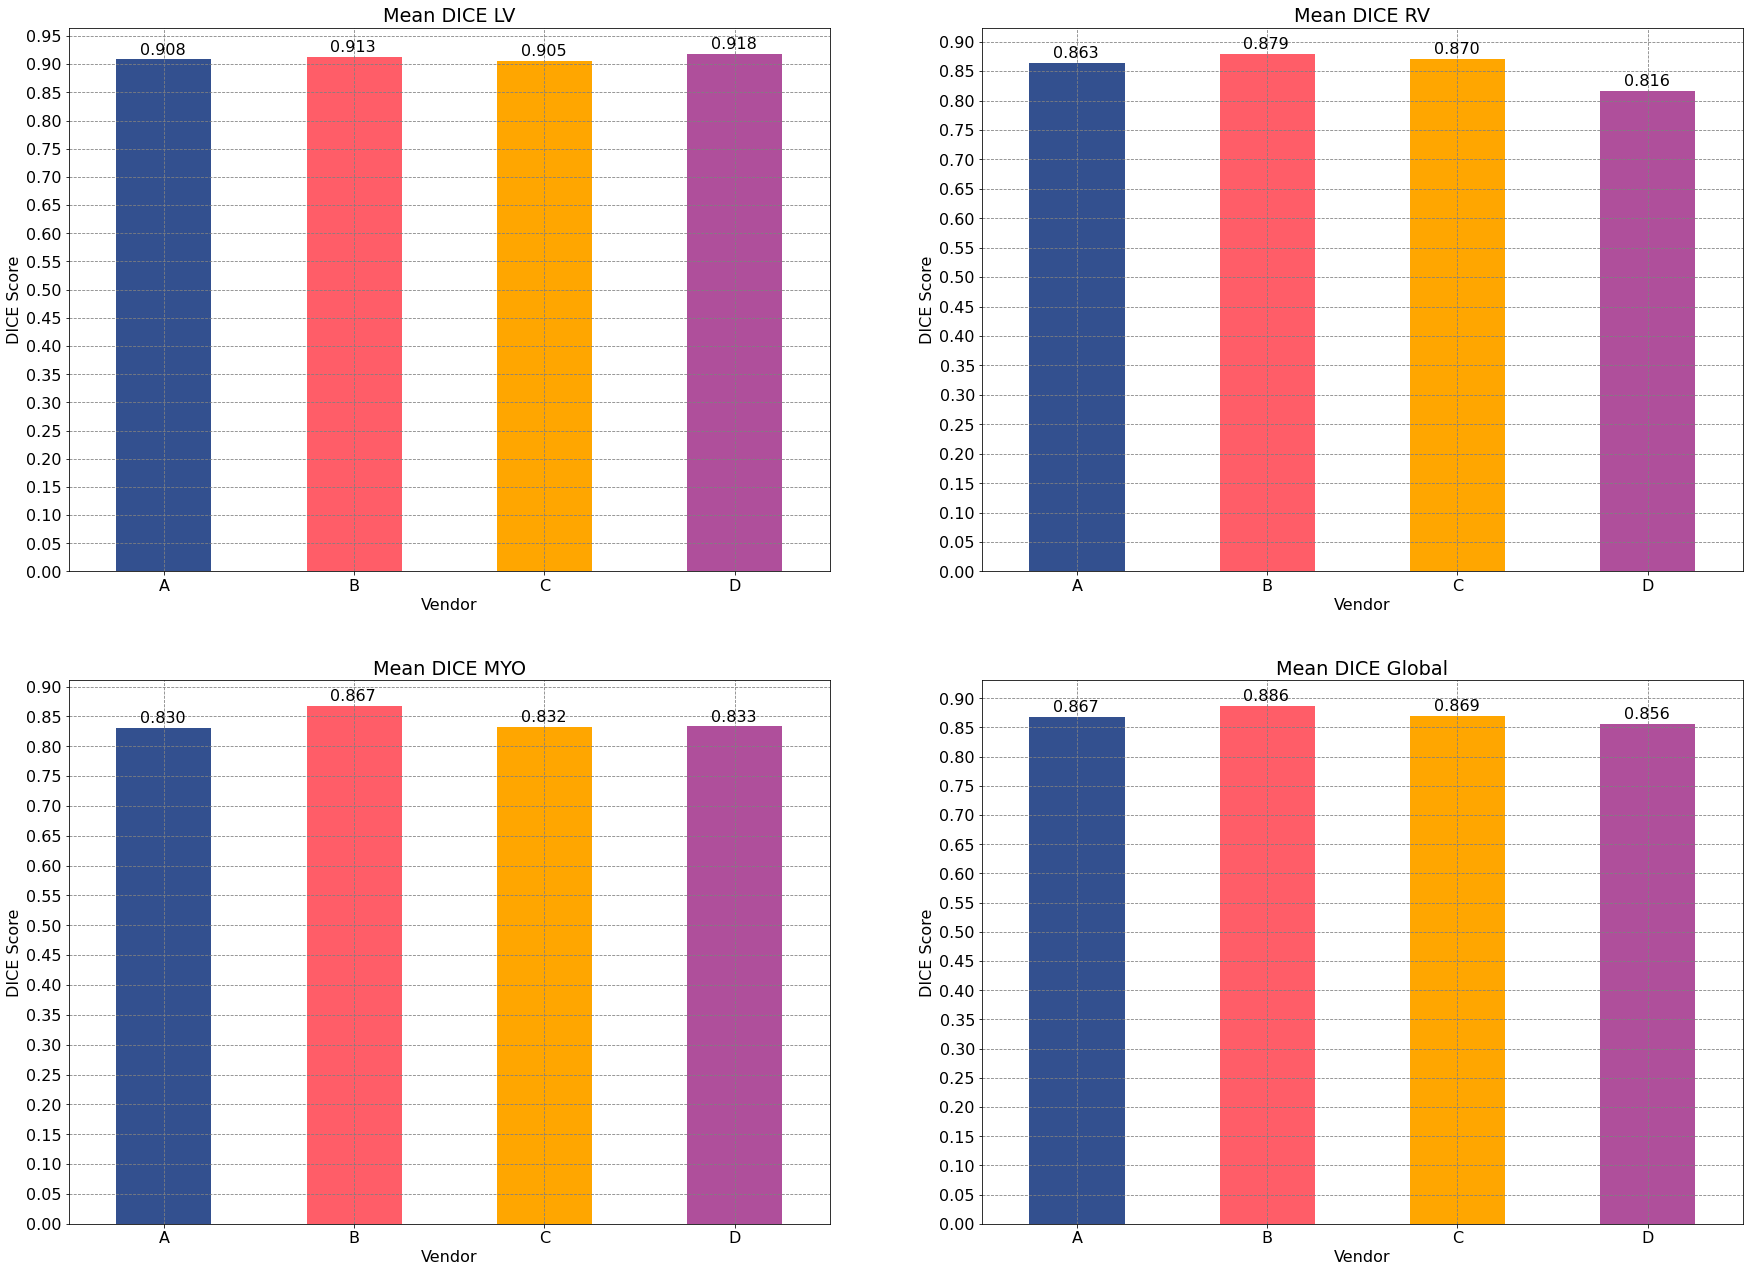

In [5]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("DICE Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean DICE LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Dice RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean DICE RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("DICE Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean DICE MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("DICE Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean DICE Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('dice_vendor.png', bbox_inches='tight', dpi=160)

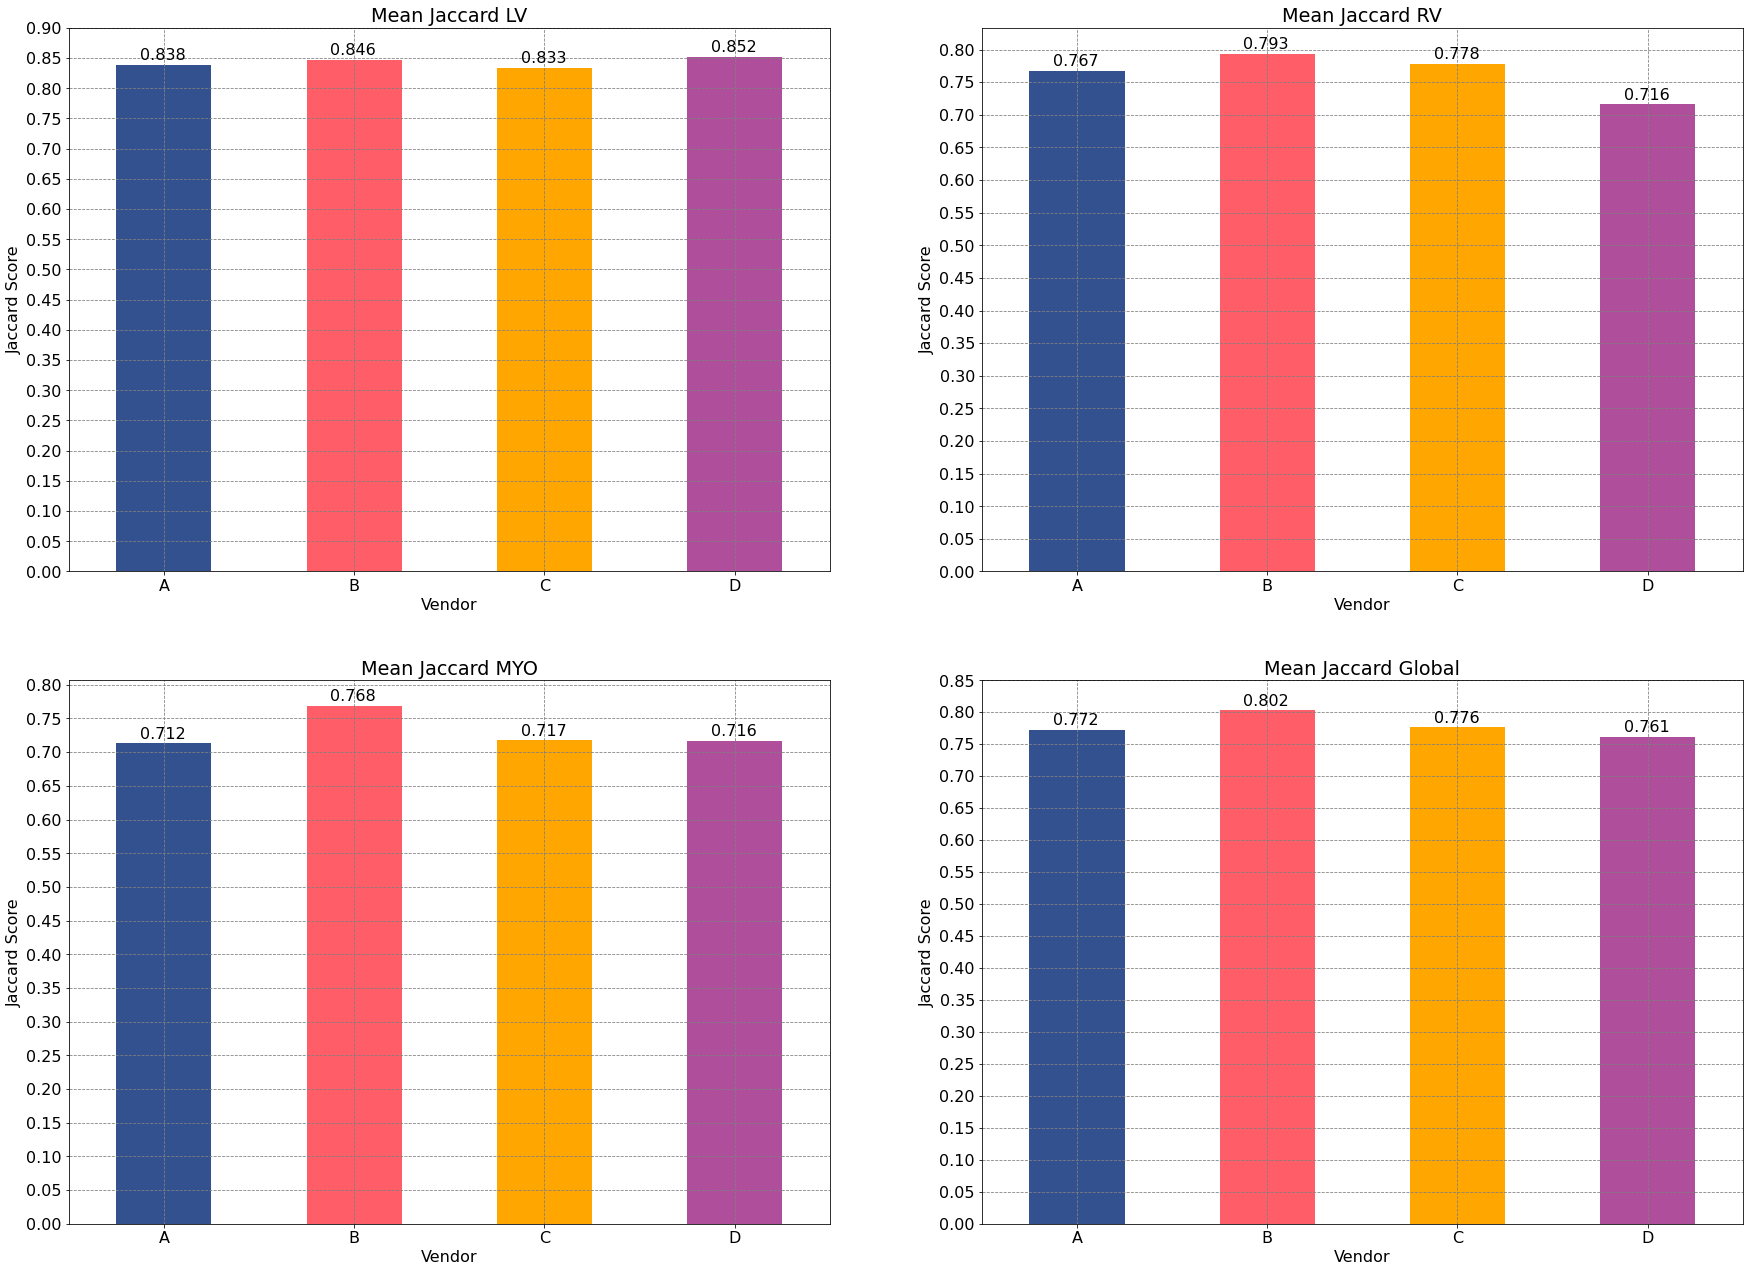

In [6]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean Jaccard LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Jaccard Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean Jaccard RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Jaccard Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean Jaccard MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Jaccard Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean Jaccard Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('jaccard_vendor.png', bbox_inches='tight', dpi=160)

In [7]:
results.groupby("Vendor")["Hausdorff MYO"].mean().max()

18.189043829864605

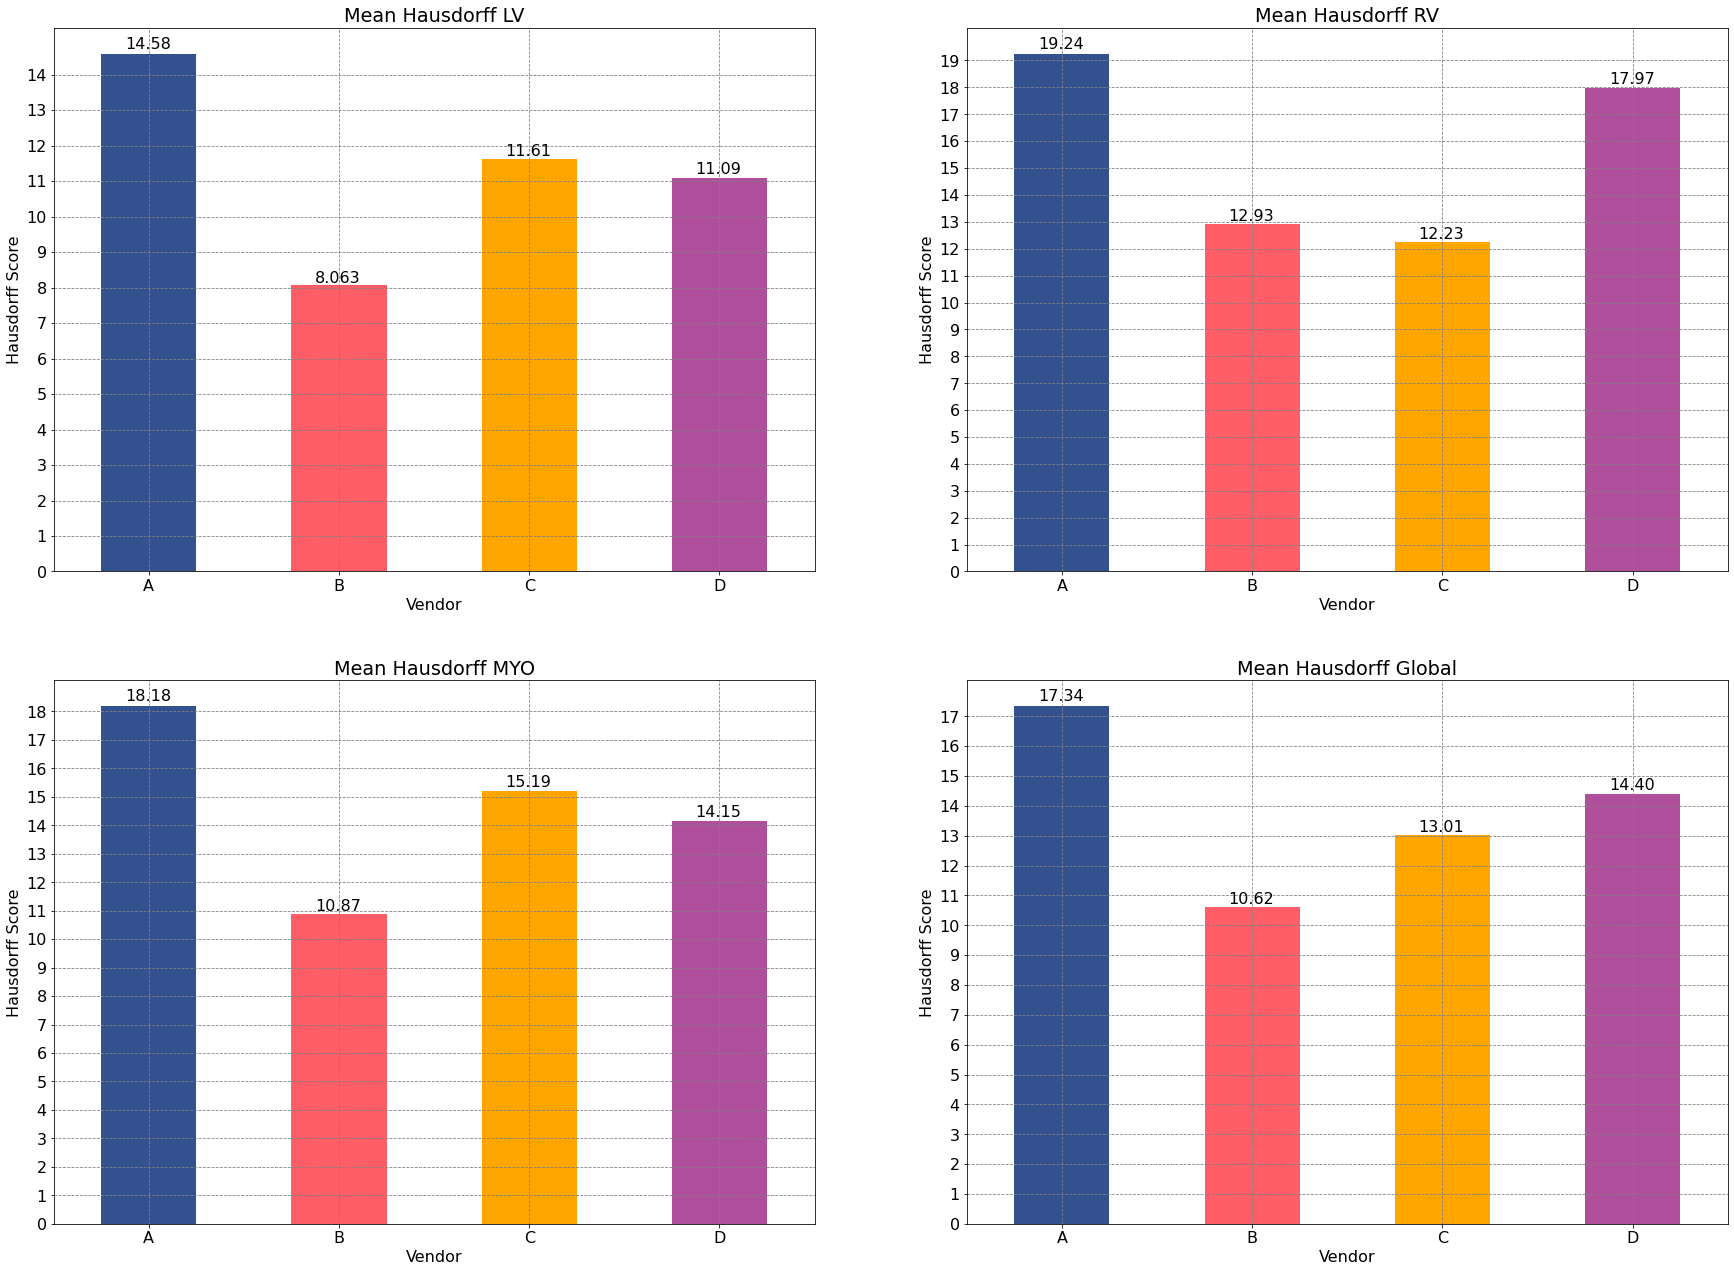

In [8]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Hausdorff Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff LV"].mean().max()+0.05, 1))
ax1[0].set_title("Mean Hausdorff LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Hausdorff Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff RV"].mean().max()+0.05, 1))
ax1[1].set_title("Mean Hausdorff RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff MYO"].mean().max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Hausdorff Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[1].set_title("Mean Hausdorff Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('hausdorff_vendor.png', bbox_inches='tight', dpi=160)

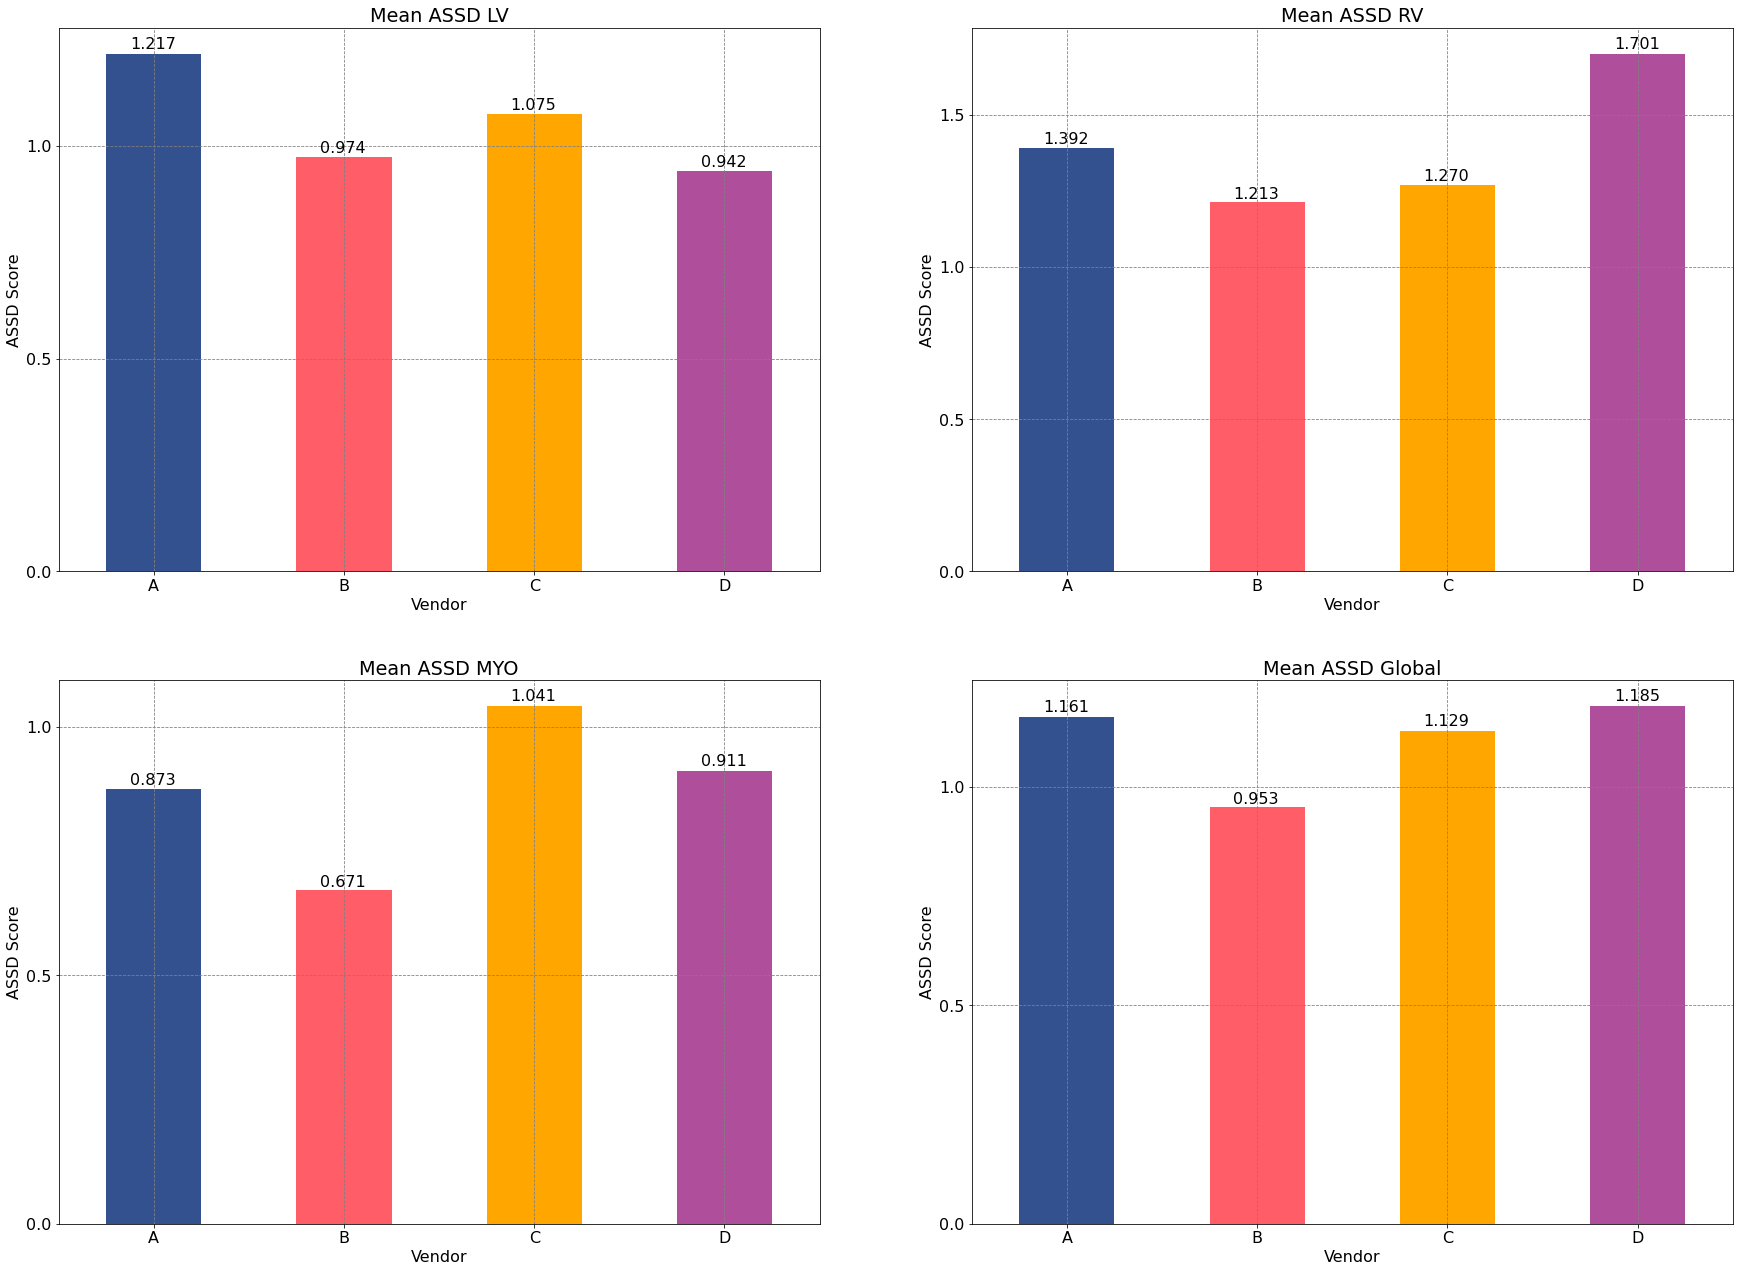

In [9]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("ASSD Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD LV"].mean().max()+0.05, 0.5))
ax1[0].set_title("Mean ASSD LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("ASSD Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD RV"].mean().max()+0.05, 0.5))
ax1[1].set_title("Mean ASSD RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("ASSD Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD MYO"].mean().max()+0.05, 0.5))
ax2[0].set_title("Mean ASSD MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('assd_vendor.png', bbox_inches='tight', dpi=160)

#### Average results

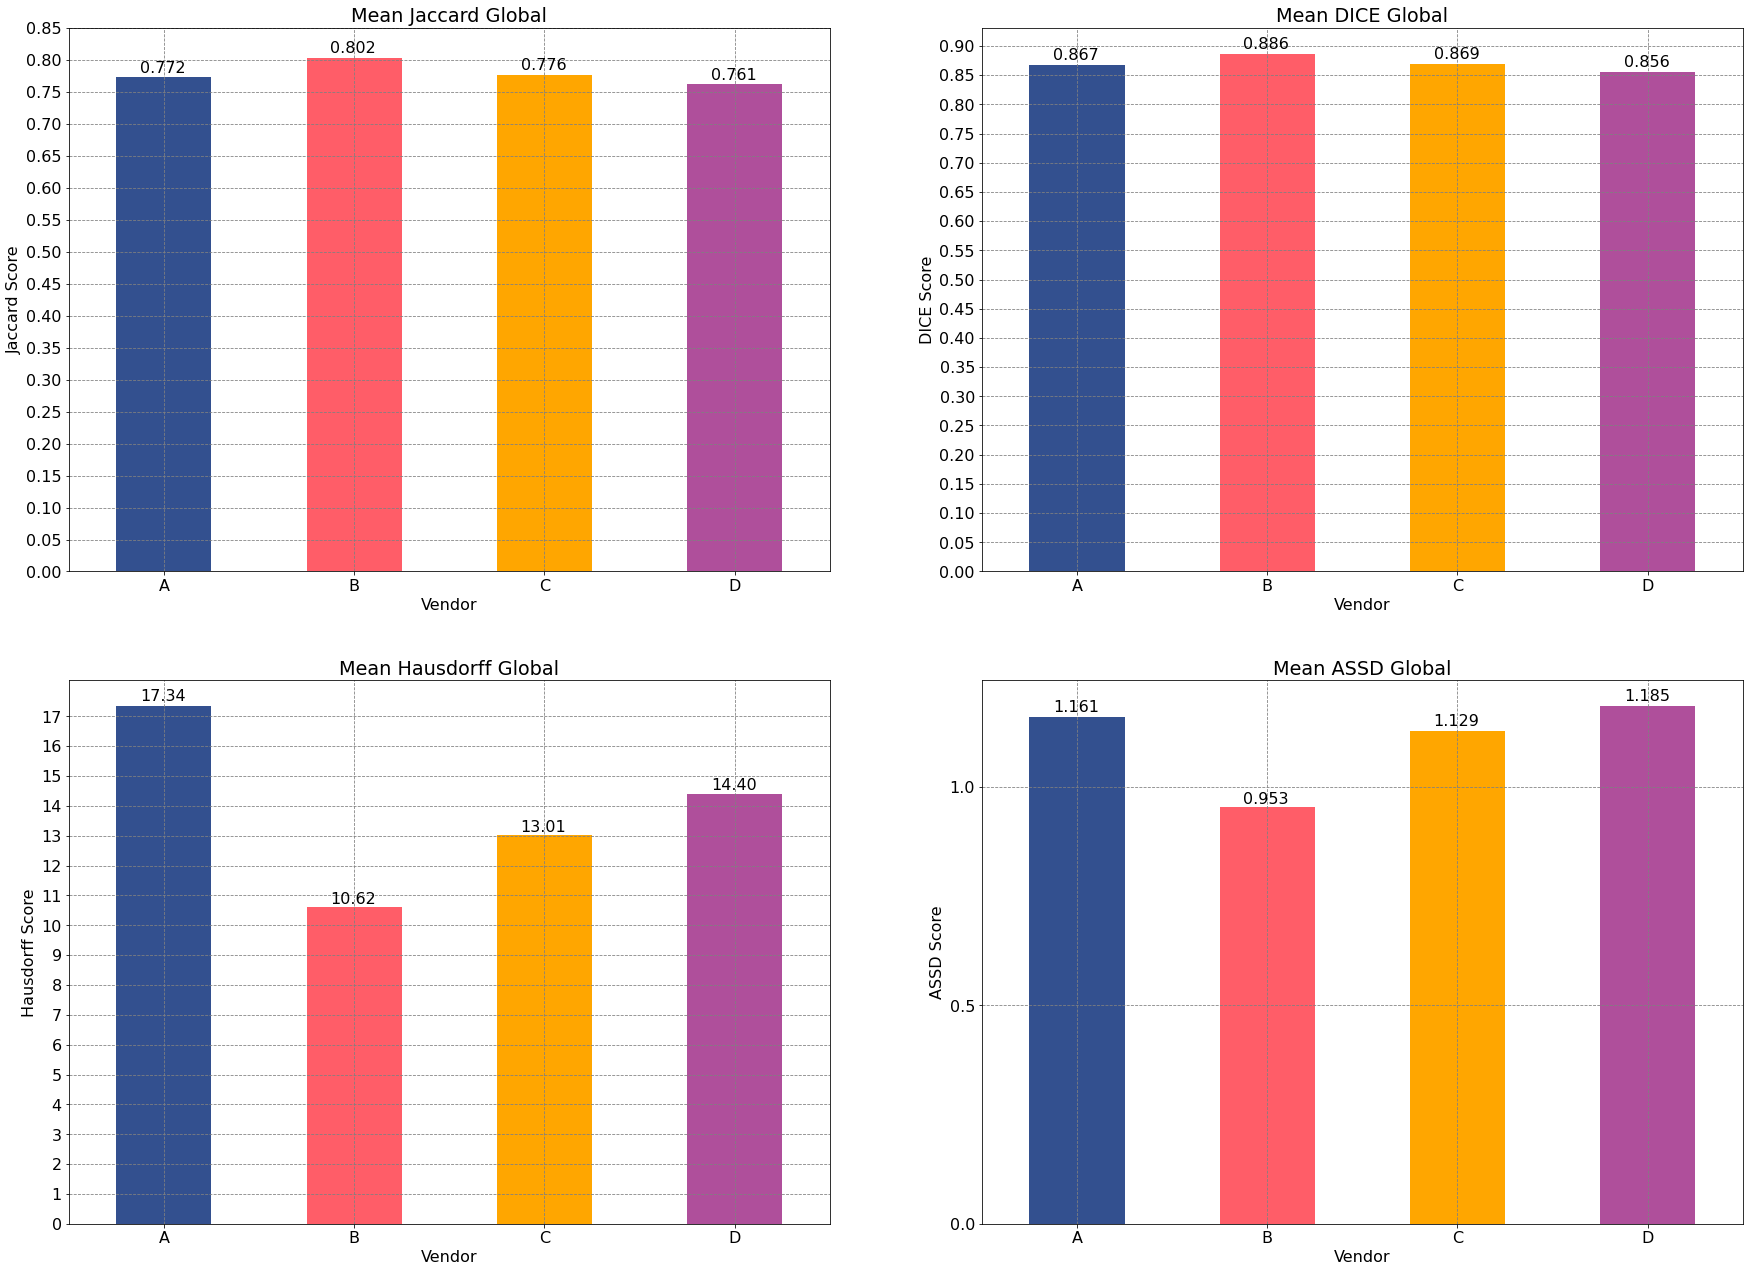

In [10]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[0].set_title("Mean Jaccard Global")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[1].set_title("Mean DICE Global")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff Global")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )

for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('mean_metrics_vendor.png', bbox_inches='tight', dpi=160)

## Ranking Metric

The details for computing the final performance rank are the following:

  1. The weighted average metric for each region (LV, RV and MYO) is computed;
  2. A min-max normalization is computed across subjects;
  3. The final normalized metrics are averaged to extract one unique value between 0 and 1;
  4. This final value is used to rank the participants.
  
Missing results in the submission will get a zero for Dice and Jaccard coefficients and the equivalent worst value for Hausdorff and surface distances. See the following example (with only the LV results) for clarity:

In [11]:
results['Dice Mean'] = results[["Dice LV", "Dice RV", "Dice MYO"]].mean(axis=1)
results['Jaccard Mean'] = results[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean(axis=1)
results['Hausdorff Mean'] = results[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean(axis=1)
results['ASSD Mean'] = results[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean(axis=1)

In [12]:
x = results[["Dice Mean", "Jaccard Mean", "Hausdorff Mean", "ASSD Mean"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
results = pd.DataFrame(x_scaled)

In [13]:
print(f"Normalized DICE: {results[0].mean()}")
print(f"Normalized Jaccard: {results[1].mean()}")
print(f"Normalized Hausdorff: {results[2].mean()}")
print(f"Normalized ASSD: {results[3].mean()}")

print(f"Computed final metric: {results.values.mean()}")

Normalized DICE: 0.7994551181810096
Normalized Jaccard: 0.7083384769729401
Normalized Hausdorff: 0.09777184637831181
Normalized ASSD: 0.12205564099379047
Computed final metric: 0.43190527063151285


In [14]:
(results[0].mean() + results[1].mean()+ (1-results[2].mean())+ (1-results[3].mean()))/4

0.8219915269454618

### Predictions Overview

In [15]:
import nibabel as nib
import warnings
warnings.filterwarnings('ignore')
import os

In [16]:
def load_nii(img_path):
    """
    Function to load a 'nii' or 'nii.gz' file, The function returns
    everyting needed to save another 'nii' or 'nii.gz'
    in the same dimensional space, i.e. the affine matrix and the header
    :param img_path: (string) Path of the 'nii' or 'nii.gz' image file name
    :return: Three element, the first is a numpy array of the image values (height, width, slices, phases),
             ## (No) the second is the affine transformation of the image, and the
             ## (No) last one is the header of the image.
    """
    nimg = nib.load(img_path)
    return np.asanyarray(nimg.dataobj), nimg.affine, nimg.header

In [17]:
results = pd.read_csv("ox/results.csv")
results.head()

,Name,ED/ES,Vendor,Centre,Dice LV,Jaccard LV,Hausdorff LV,ASSD LV,Dice MYO,Jaccard MYO,Hausdorff MYO,ASSD MYO,Dice RV,Jaccard RV,Hausdorff RV,ASSD RV
0,A1K2P5_sa_ED_gt,ED,D,5,0.959781,0.922673,3.977500,0.236487,0.846966,0.734555,4.283899,0.337041,0.909640,0.834257,11.137001,0.534781
1,A1K2P5_sa_ES_gt,ES,D,5,0.927713,0.865173,6.364000,0.313557,0.909632,0.834242,5.625035,0.279368,0.913922,0.841489,11.825957,0.401867
2,A2D1L1_sa_ED_gt,ED,A,6,0.946202,0.897898,8.000000,1.026199,0.878051,0.782613,13.080230,0.545495,0.885457,0.794457,40.716125,2.232525
3,A2D1L1_sa_ES_gt,ES,A,6,0.920622,0.852918,8.046028,0.469139,0.877274,0.781378,12.020979,0.674790,0.803400,0.671403,38.783768,3.417241
4,A2H5K9_sa_ED_gt,ED,B,2,0.951576,0.907625,4.875294,0.302380,0.865594,0.763037,12.261047,0.463913,0.888822,0.799892,11.616956,2.143170


In [21]:
directory = "ox"
save_dir = "overlays"
os.makedirs(save_dir, exist_ok=True)
for filename in os.listdir(directory):
    if filename.endswith("ED.nii.gz") or filename.endswith("ES.nii.gz"):
                
        original, _, _ = load_nii(f"ox/{filename}")
        original_gt, _, _ = load_nii("ox/{}_gt.nii.gz".format(filename[:filename.find(".nii.gz")]))
        original_pred, _, _ = load_nii("ox/{}_pred.nii.gz".format(filename[:filename.find(".nii.gz")]))
        patient = filename[filename.find("_")+1:filename.find("_")+7]
        phase = "ES" if "ES" in filename else "ED"
        vendor = results.loc[results["Name"]==f"{patient}_sa_{phase}_gt"].iloc[0]["Vendor"]
        
        for slice_number in range(original.shape[2]):
            
            os.makedirs(os.path.join(save_dir, f"vendor{vendor}"), exist_ok=True)
            overlay_path = os.path.join(
                save_dir, f"vendor{vendor}", 
                "{}_{}_slice{}.png".format(filename[:filename.find("_sa")], phase, slice_number)
            )
            #overlay_path = os.path.join(save_dir, overlay_filename)

            img = original[..., slice_number]
            mask = original_gt[..., slice_number]
            mask_pred = original_pred[..., slice_number]

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 16))
            ax1.axis('off')
            ax2.axis('off')

            masked = np.ma.masked_where(mask == 0, mask)
            ax1.imshow(img, cmap="gray")
            ax1.imshow(masked, 'jet', interpolation='bilinear', alpha=0.25)
            ax1.set_title("Original Overlay")

            masked = np.ma.masked_where(mask_pred == 0, mask_pred)
            ax2.imshow(img, cmap="gray")
            ax2.imshow(masked, 'jet', interpolation='bilinear', alpha=0.25)
            ax2.set_title("Prediction Overlay")

            plt.savefig(overlay_path, dpi=200, pad_inches=0.2, bbox_inches='tight')
            plt.close()